# Selecting a performance measure

In this notebook, we're working on the concrete dataset, which includes numerical attributes only. A good performance measure would be the `root mean squared error` (RMSE) averaged over all the predicted columns.

# Download the data

In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("elikplim/concrete-compressive-strength-data-set")

# print("Path to dataset files:", path)

## Take a quick look at the data

In [2]:
import pandas as pd

concrete_df = pd.read_csv("C:/Users/imoua/.cache/kagglehub/datasets/elikplim/concrete-compressive-strength-data-set/versions/1/concrete_data.csv")
concrete_df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
concrete_df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
concrete_df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


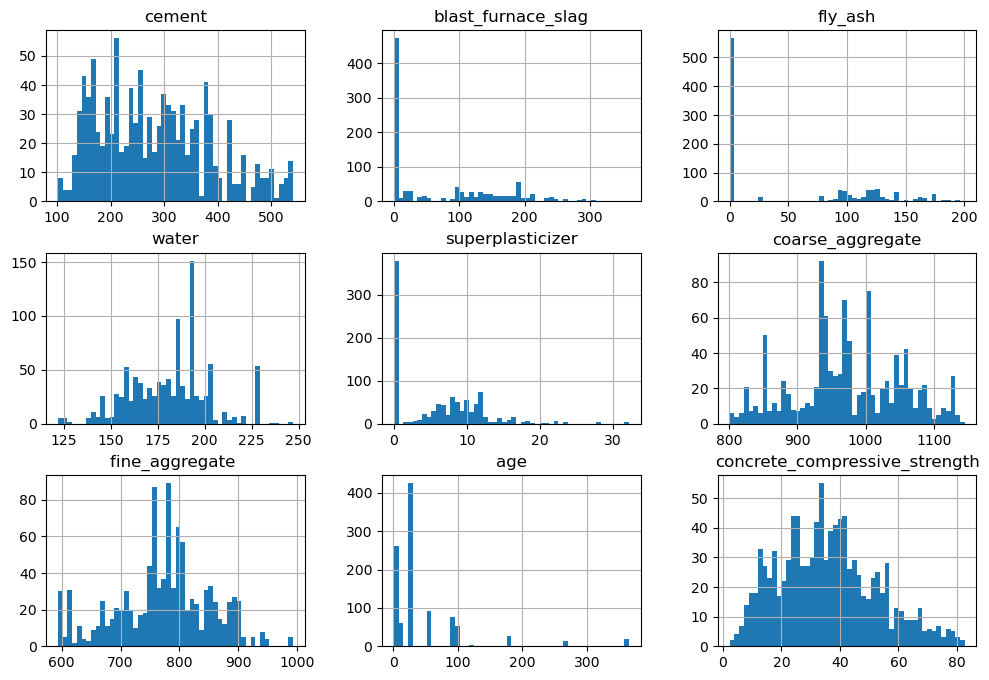

In [6]:
import matplotlib.pyplot as plt

concrete_df.hist(bins=50, figsize=(12,8))
plt.show()

# Create a Test set


In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(concrete_df, test_size=0.2, random_state=42)

In [8]:
train_set_clean = train_set.copy()

In [9]:
from gain_utils import missing_method

train_set, mask = missing_method(train_set, mechanism="mcar", method="random", missing_threshold=0.1, random_state=42)

train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 995 to 860
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         824 non-null    float64
 1   blast_furnace_slag             733 non-null    float64
 2   fly_ash                        824 non-null    float64
 3   water                          824 non-null    float64
 4   superplasticizer               824 non-null    float64
 5   coarse_aggregate               725 non-null    float64
 6   fine_aggregate                 749 non-null    float64
 7   age                            736 non-null    float64
 8   concrete_compressive_strength  824 non-null    float64
dtypes: float64(9)
memory usage: 64.4 KB


# Prepare Data for ML algorithms


In [10]:
# preprocessing pipeline with standardscaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessing_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

# Fit and transform the data
preprocessed_train_set = preprocessing_pipeline.fit_transform(train_set)

# Convert the result back to a DataFrame for easier inspection
preprocessed_train_set_df = pd.DataFrame(preprocessed_train_set, columns=concrete_df.columns)
preprocessed_train_set_df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,-1.160877,0.875948,0.982449,-0.314285,1.481654,-0.247778,NaN,-0.270951,-0.485193
1,1.308623,NaN,1.232598,-0.178192,0.391715,-1.949913,-0.280647,-0.270951,1.553981
2,-0.076865,-0.846784,1.066874,-1.046371,0.626471,1.052481,0.058190,-0.690428,-0.715394
3,-0.291807,0.275479,0.357076,0.572666,0.307873,NaN,0.594168,-0.270951,-0.145825
4,-1.065038,NaN,1.112214,-1.102686,0.777385,1.405094,NaN,-0.690428,-1.688407
...,...,...,...,...,...,...,...,...,...
819,0.027349,NaN,-0.831134,-1.740915,0.844459,0.417260,0.381009,-0.690428,-0.679796
820,-0.340192,-0.846784,1.124721,-1.806615,0.978605,1.482876,NaN,-0.505858,0.377466
821,-0.865914,-0.846784,1.126285,-0.713178,0.626471,1.381759,NaN,0.937145,-0.136332
822,1.783169,0.527700,-0.831134,-0.032713,0.458788,-1.559706,0.107475,-0.270951,1.924794


In [12]:
preprocessed_train_set_df = pd.DataFrame(preprocessed_train_set, columns=concrete_df.columns)
preprocessed_train_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         824 non-null    float64
 1   blast_furnace_slag             733 non-null    float64
 2   fly_ash                        824 non-null    float64
 3   water                          824 non-null    float64
 4   superplasticizer               824 non-null    float64
 5   coarse_aggregate               725 non-null    float64
 6   fine_aggregate                 749 non-null    float64
 7   age                            736 non-null    float64
 8   concrete_compressive_strength  824 non-null    float64
dtypes: float64(9)
memory usage: 58.1 KB


In [13]:
preprocessed_train_set_clean = preprocessing_pipeline.transform(train_set_clean)

In [14]:
from improved_gain import GAINImputer
data_x = preprocessed_train_set.copy()
gain_parameters = {
    'batch_size': 4,
    'hint_rate': 0.9,
    'alpha': 1,
    'iterations': 10
}

gain_imputer = GAINImputer(gain_parameters=gain_parameters)
imputed_data = gain_imputer.fit_transform(data_x)

 40%|████      | 4/10 [00:06<00:07,  1.31s/it]

Iteration 1/10 - D_loss: 0.5970, G_loss: 1.1728, MSE_loss: 1.1597


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


In [15]:
imputed_data_df = pd.DataFrame(imputed_data, columns=preprocessed_train_set_df.columns)
imputed_data_df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,-1.160877,0.875948,0.982449,-0.314285,1.481654,-0.247778,0.000000,-0.0,-0.485193
1,1.308623,0.000000,1.232598,-0.178192,0.391715,-1.949913,-0.280647,-0.0,1.553981
2,-0.076865,-0.846784,1.066874,-1.046371,0.626471,1.052481,0.058190,-1.0,-0.715394
3,-0.291807,0.275479,0.357076,0.572666,0.307873,0.000000,0.594168,-0.0,-0.145825
4,-1.065038,0.000000,1.112214,-1.102686,0.777385,1.405094,0.000000,-1.0,-1.688407
...,...,...,...,...,...,...,...,...,...
819,0.027349,0.000000,-0.831134,-1.740915,0.844459,0.417260,0.381009,-1.0,-0.679796
820,-0.340192,-0.846784,1.124721,-1.806615,0.978605,1.482876,0.000000,-1.0,0.377466
821,-0.865914,-0.846784,1.126285,-0.713178,0.626471,1.381759,0.000000,1.0,-0.136332
822,1.783169,0.527700,-0.831134,-0.032713,0.458788,-1.559706,0.107475,-0.0,1.924794


In [16]:
imputed_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         824 non-null    float64
 1   blast_furnace_slag             824 non-null    float64
 2   fly_ash                        824 non-null    float64
 3   water                          824 non-null    float64
 4   superplasticizer               824 non-null    float64
 5   coarse_aggregate               824 non-null    float64
 6   fine_aggregate                 824 non-null    float64
 7   age                            824 non-null    float64
 8   concrete_compressive_strength  824 non-null    float64
dtypes: float64(9)
memory usage: 58.1 KB


In [18]:
from gain_utils import imputation_rmse
import numpy as np

missing_mask = np.isnan(preprocessed_train_set)

imputation_rmse(preprocessed_train_set_clean, imputed_data, missing_mask)

{'rmse': 1.0833256907380224,
 'mae': 0.8395188693330291,
 'total_missing': 353,
 'missing_percentage': 4.7599784250269686,
 'min_error': 2.2027767190383525,
 'max_error': 5.383605380594985,
 'std_error': 1.0812447604481432}

In [19]:
test_set_clean = test_set.copy()

test_set, mask = missing_method(test_set, mechanism="mcar", method="random", missing_threshold=0.1, random_state=42)

test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 31 to 602
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         189 non-null    float64
 1   blast_furnace_slag             206 non-null    float64
 2   fly_ash                        178 non-null    float64
 3   water                          191 non-null    float64
 4   superplasticizer               206 non-null    float64
 5   coarse_aggregate               206 non-null    float64
 6   fine_aggregate                 206 non-null    float64
 7   age                            187 non-null    float64
 8   concrete_compressive_strength  206 non-null    float64
dtypes: float64(9)
memory usage: 16.1 KB


In [20]:
# Preprocess the test set

preprocessed_test_set = preprocessing_pipeline.transform(test_set)
preprocessed_test_set_clean = preprocessing_pipeline.transform(test_set_clean)

In [21]:
# Impute missing values in the test set

imputed_test_set = gain_imputer.transform(preprocessed_test_set.copy())

In [22]:
# Compute the RMSE of the imputed test set

missing_mask_test = np.isnan(preprocessed_test_set)

# Check if there are any missing values in the preprocessed_test_set
if missing_mask_test.any():
	rmse = imputation_rmse(preprocessed_test_set_clean, imputed_test_set, missing_mask_test)
	print(f"RMSE: {rmse}")
else:
	print("No missing values in the preprocessed_test_set to compute RMSE.")

RMSE: {'rmse': 1.139194860614757, 'mae': 0.9788510955955227, 'total_missing': 79, 'missing_percentage': 4.261057173678533, 'min_error': 2.3378358449636494, 'max_error': 2.2794723252446607, 'std_error': 1.092584457422066}
